In [77]:
import numpy as np
from sklearn.svm import LinearSVC
import warnings
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn import svm
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

In [78]:
column_names = ['variance','skewness','curtosis','entropy','class']
df = pd.read_csv('/Users/phuongqn/Desktop/INF552/Homework/Homework 6 Data/data_banknote_authentication.txt',error_bad_lines=False,sep=',',names=column_names)

In [79]:
df

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [80]:
df_x = df.copy()
df_y = df_x.pop('class')
X_train,X_test,y_train,y_test = train_test_split(df_x, df_y, shuffle=True, train_size=900)

In [81]:
normalizer = Normalizer()
X_train_n = normalizer.fit_transform(X_train)
X_test_n = normalizer.transform(X_test)

In [82]:
c_est=pd.DataFrame(columns=[ 'C', 'Score', 'Accuracy'])
c=[1e-10,1e-9,1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7]
for x in c:
    s=svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=x ,max_iter=10000)
    s.fit(X_train,y_train)
    score_c=s.score(X_train, y_train)
    s_accuracy = accuracy_score(y_train, s.predict(X_train))
    c_est=c_est.append({'C': x, 'Score': score_c, 'Accuracy': s_accuracy}, ignore_index= True)
c_est


,C,Score,Accuracy
0,1.000000e-10,0.560000,0.560000
1,1.000000e-09,0.560000,0.560000
2,1.000000e-08,0.560000,0.560000
3,1.000000e-07,0.560000,0.560000
4,1.000000e-06,0.560000,0.560000
5,1.000000e-05,0.560000,0.560000
6,1.000000e-04,0.560000,0.560000
7,1.000000e-03,0.888889,0.888889
8,1.000000e-02,0.981111,0.981111
9,1.000000e-01,0.986667,0.986667


In [83]:
Cs=[1e-3,1e-2,1e-1,1e0,1e1,1e2]
def l1_cv(X_t,y_t):
    s_scores = {}
    for C in Cs:
        svm_l1 = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=C)
        svm_l1_score = cross_val_score(svm_l1, X_t, y_t, cv=KFold(10),scoring='accuracy')
        s_scores[C] = np.mean(svm_l1_score)
    opt_c = max(s_scores,key=s_scores.get)
    return opt_c

In [84]:
def passive(X_train,X_test,y_train,y_test):
    p_errors = []
    X_split= X_train.copy()
    y_split = y_train.copy()
    x_t = X_train.copy()
    y_t = y_train.copy()
    for i in range(90):
        if i!=89:
            x_u,x_nu,y_u,y_nu = train_test_split(X_split,y_split, shuffle=True, train_size=10, stratify=y_split)
        else:
            x_u = x_nu
            y_u = y_nu
        x_u = np.array(x_u)
        if i==0:
            x_t = x_u
            y_t = y_u
        else:
            x_t = np.append(x_t,x_u,axis=0)
            y_t = np.append(y_t,y_u,axis=0)
        opt_c = l1_cv(x_t,y_t)
        model_1 = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_c)
        clf = model_1.fit(x_t,y_t)
        test_error = 1 - clf.score(X_test,y_test)
        p_errors.append(test_error)
        X_split = x_nu
        y_split = y_nu
    return p_errors

In [86]:
passive_errors = []
for i in range(50):
    p_errors = passive(X_train_n,X_test_n,y_train,y_test)
    passive_errors.append(p_errors)    
passive_errors = np.array(passive_errors)
p=passive_errors.mean()
p

0.005676553672316378

In [87]:
p_avg = passive_errors.mean(axis=0)
p_avg

array([0.11961864, 0.06872881, 0.03033898, 0.02419492, 0.01851695,
       0.01605932, 0.01597458, 0.0125    , 0.01118644, 0.00911017,
       0.00720339, 0.00686441, 0.00699153, 0.00605932, 0.005     ,
       0.005     , 0.00478814, 0.00487288, 0.0034322 , 0.00360169,
       0.0040678 , 0.00355932, 0.00364407, 0.00309322, 0.00262712,
       0.00275424, 0.00271186, 0.00199153, 0.00224576, 0.0020339 ,
       0.00237288, 0.00186441, 0.00177966, 0.00182203, 0.00190678,
       0.00199153, 0.00186441, 0.0020339 , 0.00182203, 0.00194915,
       0.00207627, 0.00211864, 0.00216102, 0.00182203, 0.00169492,
       0.00177966, 0.00152542, 0.00194915, 0.00190678, 0.00190678,
       0.00177966, 0.00169492, 0.00161017, 0.00144068, 0.00139831,
       0.00144068, 0.00135593, 0.00152542, 0.00144068, 0.00152542,
       0.00144068, 0.00165254, 0.00148305, 0.00139831, 0.00173729,
       0.00182203, 0.0015678 , 0.00177966, 0.00165254, 0.0015678 ,
       0.0015678 , 0.0015678 , 0.00161017, 0.00165254, 0.00148

In [92]:
def active(X_train,X_test,y_train,y_test):
    a_errors = []
    X_split= X_train.copy()
    y_split = y_train.copy()
    x_t = X_train.copy()
    y_t = y_train.copy()
    x_u,x_nu,y_u,y_nu = train_test_split(X_split,y_split, shuffle=True, train_size=10, stratify=y_split)
    for j in range(90):
        x_u = pd.DataFrame(x_u)
        
        if j==0:
            x_t = x_u
            y_t = y_u
        else:
            x_t = pd.concat([x_t,x_u])
            y_t = pd.concat([y_t,y_u])
        
        opt_c = l1_cv(x_t,y_t)
        model_1 = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_c)
        clf = model_1.fit(x_t,y_t)
        test_error = 1 - clf.score(X_test,y_test)
        a_errors.append(test_error)
        
        x = pd.DataFrame(x_nu)
        y = np.array(y_nu)
        x['class'] = y
        
        x['distances'] = clf.decision_function(x_nu)
        d = x.reindex(x.distances.abs().sort_values().index)
        d.pop('distances')
        y = d.pop('class')
        
        start = 0
        end = 10
        x_u = d[start:end]
        y_u = y[start:end]
        while sum(y_u)==0 or sum(y_u)==10:
            x_u = d[start:end]
            y_u = y[start:end]
            start = start+1
            end = end + 1
    return a_errors

In [93]:
active_errors = []
for i in range(50):
    a_errors = active(X_train_n,X_test_n,y_train,y_test)
    active_errors.append(a_errors)
active_errors = np.array(active_errors)
a_avg = active_errors.mean(axis=0)
a_avg

array([0.1384322 , 0.05148305, 0.02771186, 0.01016949, 0.0034322 ,
       0.00211864, 0.00105932, 0.00055085, 0.00038136, 0.00033898,
       0.00029661, 0.00033898, 0.00033898, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00127119, 0.00029661,
       0.00029661, 0.00105932, 0.00029661, 0.00084746, 0.00055085,
       0.00050847, 0.00029661, 0.00038136, 0.00038136, 0.00038136,
       0.00029661, 0.00033898, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00033898, 0.00029661, 0.00029661, 0.00029661,
       0.00029661, 0.00029661, 0.00029661, 0.00029661, 0.00029

In [94]:
counts = []
for i in range(90):
    counts.append((i+1)*10)
p_avg_t=p_avg.T
a_avg_t=a_avg.T
p_avg_t.shape

(90,)

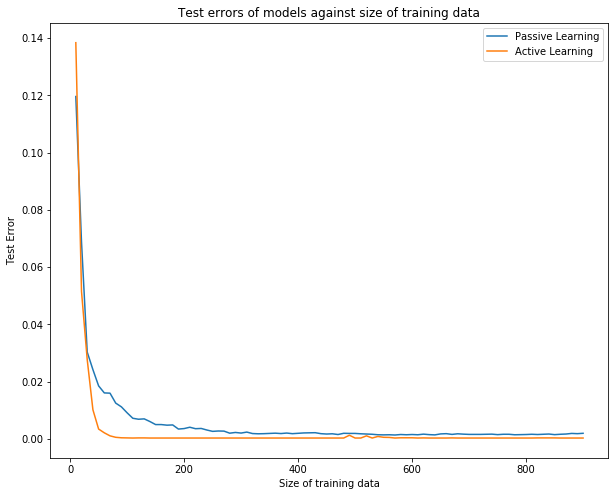

In [95]:
plt.figure(figsize=(10,8))
plt.title("Test errors of models against size of training data")
plt.plot(counts, p_avg_t, label='Passive Learning')
plt.plot(counts, a_avg_t, label='Active Learning')
plt.legend(loc='higher right')
plt.xlabel('Size of training data')
plt.ylabel('Test Error')
plt.show()

In [96]:
p

0.005676553672316378